In [329]:
import os
from PIL import Image
import numpy as np
from numpy import genfromtxt
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch

In [330]:
class Dataset:
    def __init__(self, folder, image_size):
        self.imgs = []
        self.gts = []
        self.image_size = image_size
        
        for i in range(len(os.listdir(folder))//2):
            self.imgs.append(np.array(Image.open(r""+folder+f"board_{i}.jpg")))
            self.gts.append(genfromtxt(folder+f"board_{i}.csv", delimiter=','))
            
        self.imgs = np.array(self.imgs)
        self.gts = np.array(self.gts)
            
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index):
        transform = T.Compose([
            T.ToPILImage(),
            T.Resize(self.image_size),
            T.ToTensor()])
        
        image = self.imgs[index]
        X = transform(image)
        Y = self.gts[index].T
        return X, torch.FloatTensor(Y)

In [343]:
batch_size = 64
transformed_dataset = Dataset("goBoards/", 500)
train_dl = DataLoader(transformed_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)

In [344]:
def show_images(images, nmax=64):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 20))
    ax1.set_xticks([]) 
    ax1.set_yticks([])
    ax1.imshow(make_grid((images[0].detach()[:nmax]), nrow=8).permute(1, 2, 0))
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    #print(make_grid((images[1].detach()), nrow=8).permute(1, 2, 0).shape)
    ax2.imshow(images[1][0],cmap="gray")

def show_batch(dl, nmax=64):
    for datapoint in dl:
        show_images(datapoint, nmax)
        break

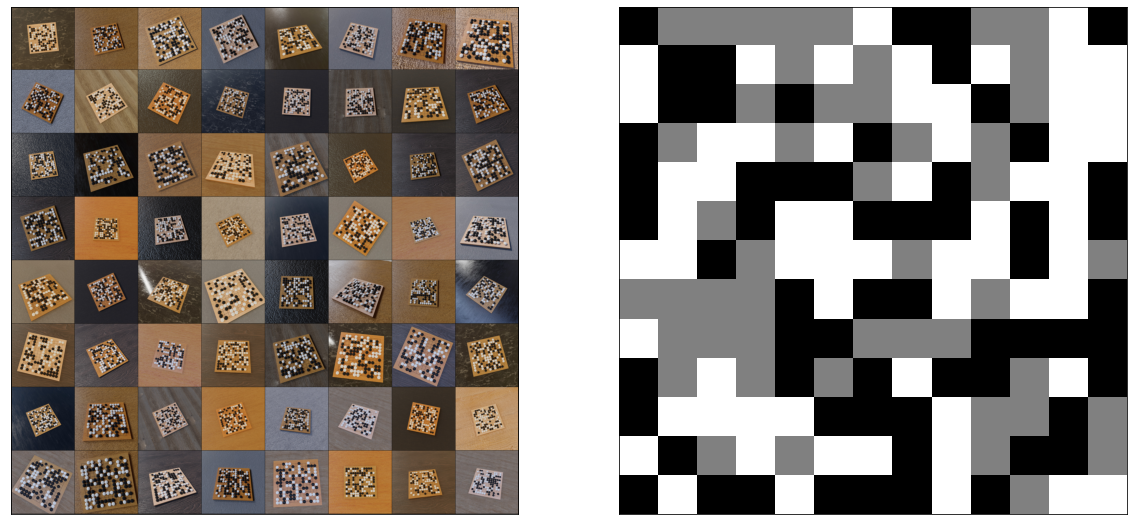

In [345]:
show_batch(train_dl)